ĐẠI HỌC QUỐC GIA – TP. HỒ CHÍ MINH
TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN
KHOA CÔNG NGHỆ THÔNG TIN
 
                                        Đồ án 2: Image Processing  
 
Môn học: Toán ứng dụng và thống kê cho công nghệ thông tin - MTH00057

Giảng viên hướng dẫn:  
- Nguyễn Đình Thúc
- Nguyễn Văn Quang Huy
- Ngô Đình Hy
 
Tp. Hồ Chí Minh, tháng 7/2023

# Sinh Viên Thực Hiện:
- Họ và Tên : Cao Nguyễn Khánh
- MSSV: 21127627
- Lớp: 21CLC04

# Mục lục/ Cách Chức Năng Làm Được
* [Danh Sách Thư Viện Sử Dụng](#c1)
* [Hàm Tạo Tên File](#c2)
* [Thay Đổi Độ Sáng](#c3)
* [Thay Đổi Độ Tương Phản](#c4)
* [Lật Ảnh Ngang/Dọc](#c5)
* [Chuyển Đổi Ảnh RGB Thành Ảnh Xám/Sepia](#c6)
* [Làm Mờ/Sắc Nét Ảnh](#c7)
* [Cắt Ảnh Theo Kích Thước (Cắt Ở Trung Tâm)](#c8)
* [Cắt Ảnh Theo Khung Hình Tròn](#c9)
* [Cắt Ảnh Theo Khung Là 2 Hình Ellip Chéo Nhau](#c10)
* [Hàm Main](#c11)
* [Tài Liệu Tham Khảo](#c12)



## Danh Sách Thư Viện Sử Dụng <a class="anchor" id="c1"></a>

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Hàm Tạo Tên File <a class="anchor" id="c2"></a>

In [73]:
def create_file_name(image_path, function_name):
    # Cắt chuỗi thành các phần tử bằng dấu chấm
    split_string = image_path.split(".")
    
    if (len(split_string) < 2):
        raise ValueError("tên file không hợp lệ ")

    image_output_path = split_string[0]
    
    for i in range(1, len(split_string) - 1):
        image_output_path = image_output_path + "." + split_string[i]
        
    image_output_path = image_output_path + "_" + function_name + "." + split_string[-1]
    
    return image_output_path


Hàm này giúp tạo ra các tên file kết quả

VD:
create_file_name("cat.jpg", "brightness") => cat_brightness.jpg

## Hình Ảnh Gốc: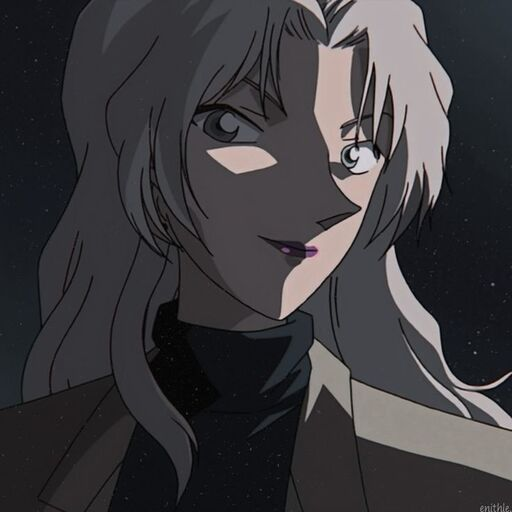


## Thay Đổi Độ Sáng <a class="anchor" id="c3"></a>

#### Ý TƯỞNG:
- Nhân mảng img_array với brightness_factor để điều chỉnh độ sáng của bức ảnh. Kết quả là một mảng mới brightened_image_array chứa các giá trị pixel đã được điều chỉnh độ sáng. Bước này dựa trên việc nhân từng giá trị pixel với brightness_factor.

- Sử dụng np.clip() để giới hạn các giá trị trong brightened_image_array trong khoảng hợp lệ từ 0 đến 255.

- Chuyển đổi các giá trị pixel trong mảng brightened_image_array thành số nguyên bằng cách sử dụng astype(int).

- Trả về brightened_image_array, mảng biểu diễn cho bức ảnh với độ sáng đã được điều chỉnh.


In [74]:
def adjust_the_brightness_of_image(img_array, brightness_factor):
    # Thay đổi độ sáng
    #brightness_factor = 1.5  # Giá trị độ sáng mới, có thể điều chỉnh
    brightened_image_array = np.clip(img_array * brightness_factor, 0, 255).astype(int)
    
    return brightened_image_array

def the_brightness(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
    image_output_path = create_file_name(image_path, "brightness")
    
    
    # Gọi các hàm hoặc thực hiện công việc liên quan đến Option 1
    brightness_factor = 1.5
    
    brightened_image = adjust_the_brightness_of_image(img_array, brightness_factor)
    
    plt.imshow(brightened_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()

#### Kết Quả
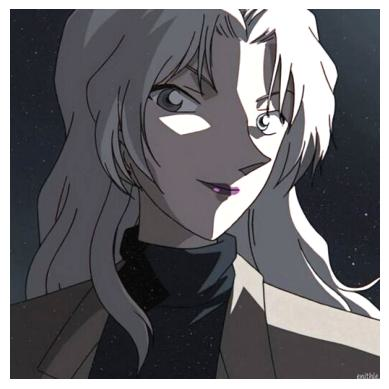

## Thay Đổi Độ Tương Phản  <a class="anchor" id="c4"></a>

#### Ý Tưởng:
- Đầu vào của hàm là img_array, một mảng numpy biểu diễn hình ảnh, và contrast_factor, một số thực dùng để điều chỉnh độ tương phản của hình ảnh.

- Bước đầu tiên là tính giá trị trung bình của tất cả các điểm ảnh trong img_array bằng hàm np.mean. Điều này sẽ giúp chúng ta chuyển hình ảnh về trung tâm đồ thị màu sắc, giúp việc điều chỉnh độ tương phản dễ dàng hơn.

- Trừ giá trị trung bình (mean) từ mỗi điểm ảnh trong img_array.
- Nhân kết quả với contrast_factor để điều chỉnh độ tương phản .
- Cộng lại giá trị trung bình (mean) vào kết quả.
- Quá trình trên giúp tăng độ tương phản của hình ảnh khi contrast_factor > 1 và giảm độ tương phản khi contrast_factor < 1.

- Sau khi tính toán xong hình ảnh mới có độ tương phản đã điều chỉnh, đoạn code sử dụng hàm np.clip để đảm bảo rằng giá trị của từng điểm ảnh nằm trong khoảng từ 0 đến 255

- chuyển kiểu dữ liệu của mảng contrast_image_array sang số nguyên (int)

In [75]:
def adjusting_the_contrast_of_image(img_array, contrast_factor):
    # Thay đổi độ tương phản
    # contrast_factor = 1.75
    
    # Giá trị độ tương phản mới, có thể điều chỉnh
    
    mean = np.mean(img_array)
    
    contrast_image_array = (img_array - mean) * contrast_factor + mean
    
    contrast_image_array = np.clip(contrast_image_array, 0, 255).astype(int) 
    
    return contrast_image_array


def the_contrast(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
    image_output_path = create_file_name(image_path, "contrast")
    
    
    # Gọi các hàm hoặc thực hiện công việc liên quan đến Option 2
    
    contrast_factor = 1.75
    contrast_image = adjusting_the_contrast_of_image(img_array, contrast_factor)
    plt.imshow(contrast_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()
    

#### Kết Quả
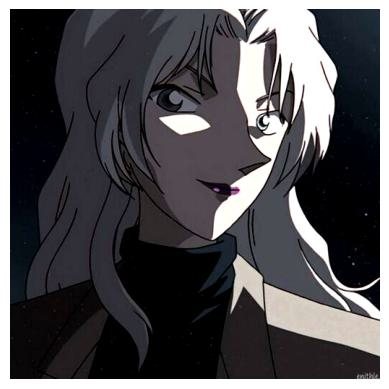

## Lật Ảnh Ngang/Dọc <a class="anchor" id="c5"></a>

#### Ý Tưởng:
- Lật ngang ảnh: Đoạn code sử dụng hàm np.flip để thực hiện lật ngang hình ảnh. Tham số axis=1 cho biết rằng ta muốn lật ngang theo chiều ngang, tức là lật theo trục thứ 2 của mảng (trục dọc).

- Lật dọc ảnh: Đoạn code sử dụng hàm np.flip để thực hiện lật dọc hình ảnh. Tham số axis=0 cho biết rằng ta muốn lật dọc theo chiều dọc, tức là lật theo trục thứ 1 của mảng (trục ngang).

- chuyển kiểu dữ liệu của mảng sang số nguyên (int) bằng cách sử dụng phương thức astype.

Cuối cùng, hàm trả về hình ảnh mới sau khi lật ngang được lưu trong biến flipped_image_array.

In [76]:
def horizontal_flip_flips_an_image(img_array):
    
    # Lật ngang ảnh bằng cách đảo ngược theo chiều ngang (axis=1)
    flipped_image_array = np.flip(img_array, axis = 1)
    
    flipped_image_array = flipped_image_array.astype(int)
    
    return flipped_image_array

    
def vertical_flip_flips_an_image(img_array):  
    # Lật dọc ảnh bằng cách đảo ngược theo chiều dọc (axis=0)
    flipped_image_array = np.flip(img_array, axis = 0)
    
    flipped_image_array = flipped_image_array.astype(int)
    
    return flipped_image_array

def horizontal_flip(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
    image_output_path = create_file_name(image_path, "horizontalflip")
    
    # Gọi các hàm hoặc thực hiện công việc liên quan đến Option 3
    flipped_image = horizontal_flip_flips_an_image(img_array)
    plt.imshow(flipped_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()
    
def vertical_flip(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
    image_output_path = create_file_name(image_path, "verticalflip")
    
    # Gọi các hàm hoặc thực hiện công việc liên quan đến Option 3
    flipped_image = vertical_flip_flips_an_image(img_array)
    plt.imshow(flipped_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()


#### Kết Quả:

- Lật Ngang
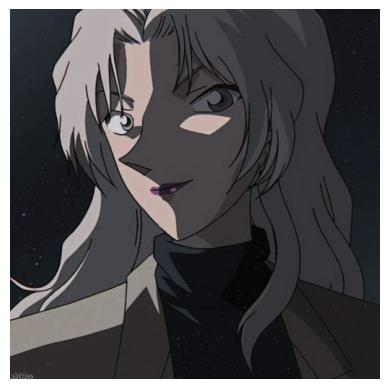

- Lật Dọc
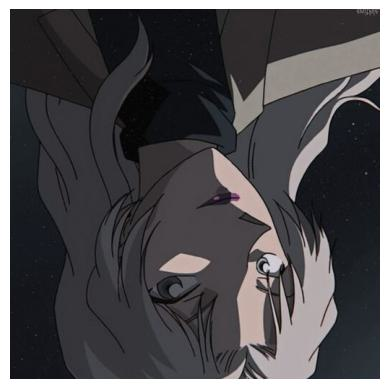

## Chuyển Đổi Ảnh RGB Thành Ảnh Xám/Sepia <a class="anchor" id="c6"></a>

#### Ý Tưởng:
##### GRAY
- convert_an_image_rgb_to_grayscale(img_array): Đây là hàm chuyển đổi một hình ảnh từ không gian màu RGB sang không gian màu xám (grayscale). Ý tưởng chính của hàm này là sử dụng công thức đơn giản để tính giá trị màu xám của từng điểm ảnh trong hình ảnh RGB.

- Công thức tính giá trị màu xám (grayscale) tại mỗi điểm ảnh là:
  0.2989 * R + 0.5870 * G + 0.1140 * B
- Trong đó, R, G, và B lần lượt là giá trị màu đỏ, màu xanh lá cây và màu xanh lam tại điểm ảnh đó. Kết quả của phép tính này là giá trị màu xám tương ứng với mỗi điểm ảnh.

- Sau khi tính toán xong, kết quả được lưu vào biến grayscale_image_array.
##### SEPIA
- convert_an_image_rgb_to_sepia(img_array): Đây là hàm chuyển đổi một hình ảnh từ không gian màu RGB sang không gian màu sepia.

- một ma trận sepia_filter với kích thước 3x3. Ma trận này là một bộ lọc sepia được sử dụng để thực hiện việc chuyển đổi màu. Mỗi hàng của ma trận sepia_filter chứa các hệ số màu được sử dụng để tính toán màu mới tại từng điểm ảnh của hình ảnh.

- Để chuyển đổi màu của hình ảnh, đoạn code sử dụng phép nhân ma trận giữa ma trận img_array (biểu diễn hình ảnh RGB) và ma trận sepia_filter được chuyển vị (đảo chiều) (sepia_filter.T). Kết quả của phép nhân ma trận là một mảng mới chứa các giá trị màu được tính toán dựa trên ma trận sepia_filter.

- Sau khi tính toán xong mảng mới chứa các giá trị màu sepia, đoạn code sử dụng hàm np.clip để đảm bảo rằng giá trị của từng điểm ảnh nằm trong khoảng từ 0 đến 255. Chuyển kiểu dữ liệu của mảng sepia_image_array sang số nguyên (int)


In [77]:
def convert_an_image_rgb_to_grayscale(img_array):
    # Convert RGB image to grayscale
    grayscale_image_array = np.dot(img_array[..., :3], [0.2989, 0.5870, 0.1140])
    
    
    grayscale_image_array = grayscale_image_array.astype(int)
    
    return grayscale_image_array

def rgb_to_grayscale(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
    image_output_path = create_file_name(image_path, "grayscale")
    
    # Gọi các hàm hoặc thực hiện công việc liên quan đến Option 3
    grayscale_image = convert_an_image_rgb_to_grayscale(img_array)
    plt.imshow(grayscale_image, cmap='gray')
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()
    
def convert_an_image_rgb_to_sepia(img_array):
    
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    # Convert RGB image to sepia
    sepia_image_array = img_array.dot(sepia_filter.T)
    
    sepia_image_array = np.clip(sepia_image_array, 0, 255).astype(int)  
    
    return sepia_image_array

def rgb_to_sepia(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
    image_output_path = create_file_name(image_path, "sepia")
    
    # Gọi các hàm hoặc thực hiện công việc liên quan đến Option 3
    sepia_image = convert_an_image_rgb_to_sepia(img_array)
    plt.imshow(sepia_image, cmap='gray')
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()    

#### Kết Quả:

- Gray
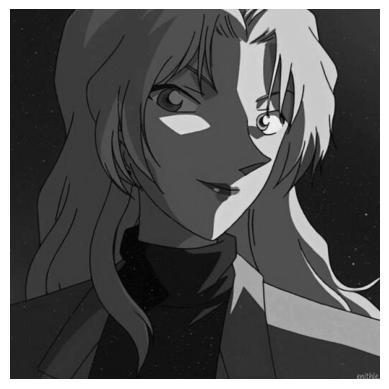

- Sepia
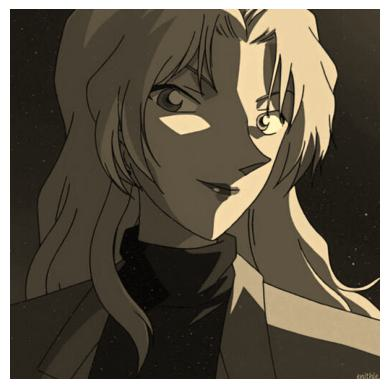

## Làm Mờ/Sắc Nét Ảnh <a class="anchor" id="c7"></a>

#### Ý Tưởng:
- blur_or_sharpened_an_image(img_array, kernel): Đây là hàm thực hiện phép làm mờ hoặc sắc nét trên một hình ảnh bằng cách áp dụng một ma trận bộ lọc (kernel).

- Đầu vào của hàm gồm img_array, một mảng numpy biểu diễn hình ảnh, và kernel, một ma trận bộ lọc có kích thước chẵn (như 3x3 hoặc 5x5) và được sử dụng để thực hiện phép làm mờ hoặc sắc nét.

- Hàm bắt đầu bằng việc lấy kích thước của hình ảnh từ img_array và lưu trữ vào height, width và channels.

- khởi tạo một hình ảnh mới blur_or_sharpened_image với cùng kích thước như hình ảnh ban đầu, và các giá trị trong mảng mới được chuyển thành kiểu dữ liệu số nguyên (dtype=np.int_).

- các biến n và m từ kích thước của ma trận kernel. Biến n là số hàng hoặc số cột của ma trận kernel, m là phần nguyên của n/2.

- tính tổng tất cả các phần tử trong kernel và lưu vào biến total_sum.

- hàm duyệt qua từng điểm ảnh trong hình ảnh, trừ viền của hình ảnh có độ rộng m để đảm bảo không xảy ra tràn số khi thực hiện phép toán.

- Tại mỗi điểm ảnh, hàm xây dựng một mảng imagenxn bằng cách trích xuất một vùng của hình ảnh có kích thước bằng với kích thước của kernel, và sau đó thực hiện phép nhân các phần tử của imagenxn với kernel và tính tổng.

- Kết quả của phép nhân và tổng được lưu vào blur_or_sharpened_image tại vị trí tương ứng.

- Sau khi duyệt qua toàn bộ hình ảnh, đoạn code chia blur_or_sharpened_image cho total_sum và sau đó sử dụng hàm np.clip để đảm bảo rằng giá trị của từng điểm ảnh nằm trong khoảng từ 0 đến 255 (giá trị tối thiểu và tối đa của một điểm ảnh 8-bit).

- hàm trả về hình ảnh mới đã được thực hiện phép làm mờ hoặc sắc nét.

In [78]:
def blur_or_sharpened_an_image(img_array, kernel):
    # Get image dimensions
    height, width, channels = img_array.shape
    

    # Initialize the sharpened image with the same data type as the original image
    blur_or_sharpened_image = np.zeros_like(img_array, dtype=np.int_)
    
    n = kernel.shape[0]   
    m = int(n/2)
    total_sum = np.sum(kernel)
 
    
    for i in range(m, height - m):
        for j in range(m, width - m):
             
            if i - n//2 >= 0 and i + n//2 + 1 <= height and j - n//2 >= 0 and j + n//2 + 1 <= width:
                imagenxn = np.array(img_array[i-n//2:i+n//2+1, j-n//2:j+n//2+1], dtype = np.int_)
            
            for i1 in range(n):
                for j1 in range(n):
                    blur_or_sharpened_image[i, j] = blur_or_sharpened_image[i, j] + (imagenxn[i1, j1] * kernel[i1, j1])
    
    blur_or_sharpened_image = blur_or_sharpened_image/total_sum
    blur_or_sharpened_image = np.clip(blur_or_sharpened_image, 0, 255).astype(int)
    
    return blur_or_sharpened_image
  


def blurred(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
   
    image_output_path = create_file_name(image_path, "blurred")
    
    # Gọi các hàm hoặc thực hiện công việc liên quan đến Option 3
    kernel_size = 3
    kernel = np.ones((kernel_size, kernel_size))
#     kernel = ([[1, 1, 1],
#                [1, 1, 1],
#                [1, 1, 1]])
    
    blurred_image = blur_or_sharpened_an_image(img_array, kernel)
    
    plt.imshow(blurred_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()

    
def sharpened(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
   
    image_output_path = create_file_name(image_path, "sharpened")
    
    # Gọi các hàm hoặc thực hiện công việc liên quan đến Option 3
    # Define the sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    
    sharpened_image = blur_or_sharpened_an_image(img_array, kernel)
    
    plt.imshow(sharpened_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()    
    
    
    
    

#### Kết Quả:

- Làm Mờ
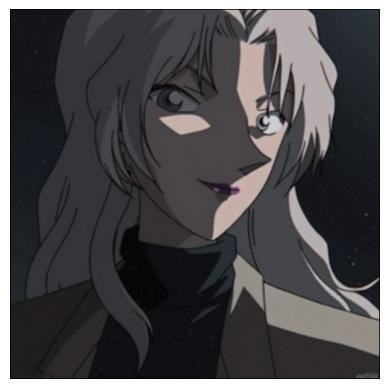

- Làm Nét
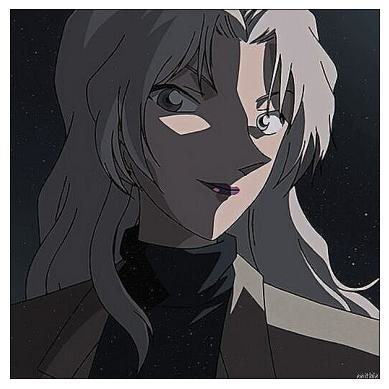

## Cắt Ảnh Theo Kích Thước (Cắt Ở Trung Tâm) <a class="anchor" id="c8"></a>

#### Ý Tưởng:
- crop_center(img_array, target_width, target_height): Đây là hàm thực hiện việc cắt một phần của hình ảnh từ trung tâm của hình ảnh ban đầu.

- Đầu vào của hàm gồm img_array, một mảng numpy biểu diễn hình ảnh, và target_width, target_height, là kích thước mục tiêu mà chúng ta muốn cắt ra từ hình ảnh.

- lấy kích thước của hình ảnh từ img_array và lưu trữ vào width, height và c
- tính toán vị trí bắt đầu và kết thúc của phần cần cắt ra từ hình ảnh. Cụ thể, vị trí bắt đầu và kết thúc được tính bằng cách lấy nửa kích thước mục tiêu và trừ nửa này từ width để tính left, và từ height để tính top. Sau đó, right được tính bằng cách cộng target_width vào left, và bottom được tính bằng cách cộng target_height vào top.

- cắt hình ảnh tại vị trí trung tâm bằng cách sử dụng lát cắt indexing của numpy. Hình ảnh mới được lưu trong biến cropped_image_array.

- chuyển kiểu dữ liệu của mảng cropped_image_array sang số nguyên (int) và trả về kết quả.

In [79]:
def crop_center(img_array, target_width, target_height):
    width, height, c = img_array.shape
    left = (width - target_width) // 2
    top = (height - target_height) // 2
    right = left + target_width
    bottom = top + target_height
     # Cắt ảnh tại vị trí trung tâm
    cropped_image_array = img_array[top:bottom, left:right]
    cropped_image_array = cropped_image_array.astype(int)    

    return cropped_image_array


def crop(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
   
    image_output_path = create_file_name(image_path, "crop_center")
    
    
    # Kích thước muốn cắt 
    h = int(min(img_array.shape[0]*2/3, img_array.shape[1]*2/3 ))
   
    target_width = h
    target_height = h

    
    crop_image = crop_center(img_array, target_width, target_height)
    
    plt.imshow(crop_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()    

#### Kết Quả:
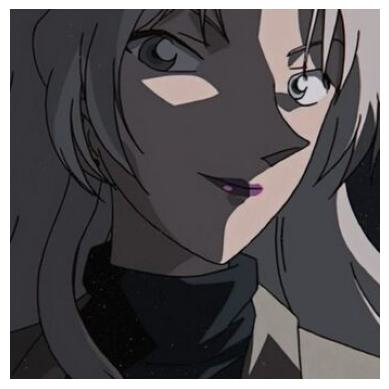

## Cắt Ảnh Theo Khung Hình Tròn <a class="anchor" id="c9"></a>

#### Ý Tưởng:
- crop_circle_an_image(img_array): Đây là hàm thực hiện việc cắt một vùng hình tròn từ hình ảnh ban đầu.

- Đầu vào của hàm gồm img_array, một mảng numpy biểu diễn hình ảnh.

- lấy kích thước của hình ảnh từ img_array và lưu trữ vào width, height và c (số kênh màu, ví dụ: 3 nếu hình ảnh là ảnh RGB).

- tọa độ tâm của hình ảnh bằng cách chia kích thước theo chiều rộng và chiều cao cho 2 (center_x, center_y).

- kính hình tròn (radius) bằng cách lấy giá trị nhỏ nhất giữa center_x và center_y.

- duyệt qua từng phần tử của mảng img_array bằng cách sử dụng hai vòng lặp for.

- Tại mỗi điểm ảnh (i, j), hàm kiểm tra xem điểm ảnh đó có nằm ngoài bán kính của hình tròn không. Nếu (i - center_x) ^ 2 + (j - center_y) ^ 2 lớn hơn bình phương của bán kính (radius ^ 2), tức là điểm ảnh nằm ngoài hình tròn, thì hàm đặt giá trị màu của điểm ảnh đó thành (0, 0, 0), tức là màu đen.

- Sau khi duyệt qua toàn bộ mảng, hình ảnh đã cắt hình tròn được lưu trữ trong img_array.

In [100]:
def crop_circle_an_image(img_array):
    img_array_copy = img_array.copy()
    width, height, c = img_array_copy.shape
    # Tính tọa độ tâm của ảnh
    center_x, center_y = width // 2, height // 2   
    
    # Tính bán kính hình tròn
    radius = min(center_x, center_y)   
     
    
    
    # Duyệt từng phần tử của mảng
    for i, row in enumerate(img_array_copy):
        for j, element in enumerate(row):
            if(((i-center_x)**2 + (j-center_y)**2) > radius**2 ):
                element[0] = 0
                element[1] = 0
                element[2] = 0

    return img_array_copy


def crop_circle(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
   
    image_output_path = create_file_name(image_path, "crop_circle")
       
    crop_image = crop_circle_an_image(img_array)
    
    plt.imshow(crop_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()   
        

#### Kết Quả:
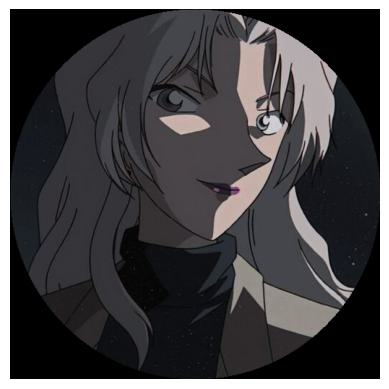

## Cắt Ảnh Theo Khung Là 2 Hình Ellip Chéo Nhau <a class="anchor" id="c10"></a>

#### Ý Tưởng
- find_line_equation(point1, point2): hàm tìm đường thẳng đi qua 2 điểm 
- find_intersection(line1, line2): hàm tìm giao diểm của 2 đường thẳng
- distance_between_points(point1, point2): hàm tính khoảng cách giữa 2 điểm
- ta sẽ xác định tiêu cự của bắc hình bằng cách như hình vẽ sau, point1 = (0, height//9)
- độ dài không đổi = khoảng cách point1 đến 2 tiêu cự trong 1 hình elip - độ lớn ma trân /9
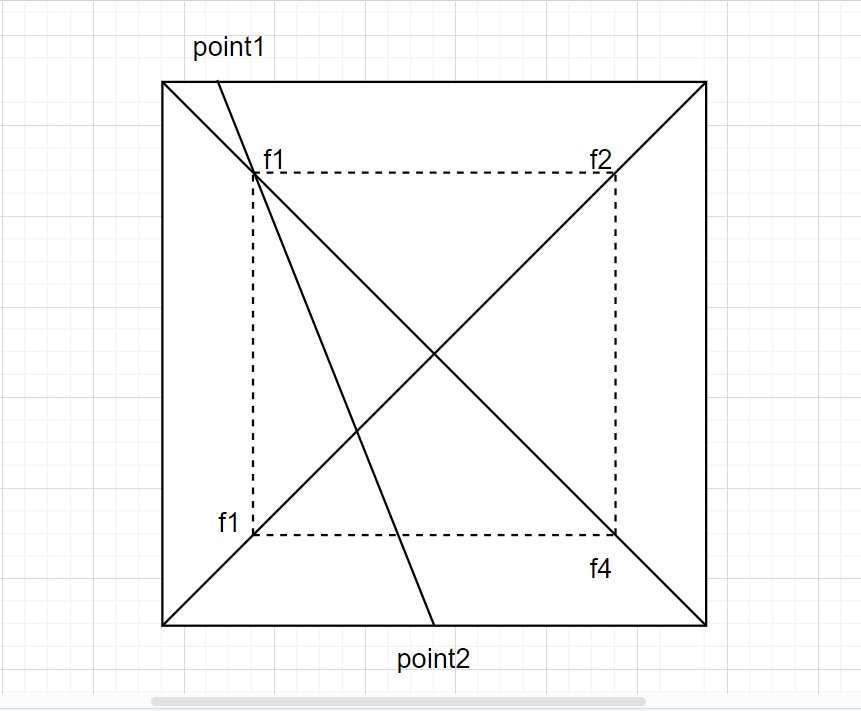

- Ta sẽ sử dụng tính chất của hình elip.
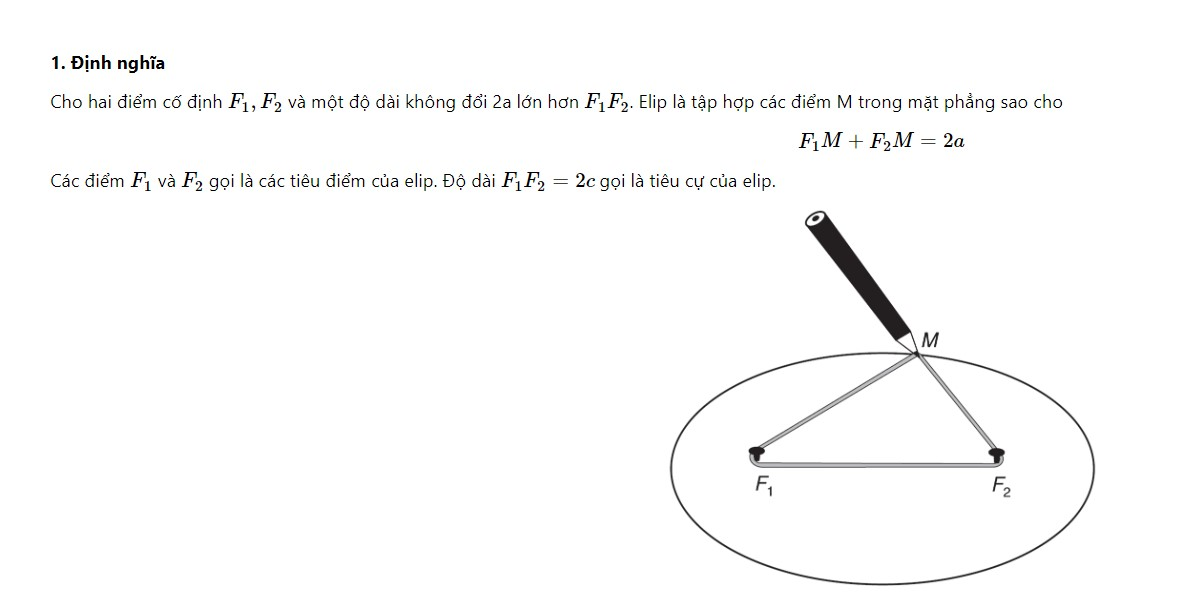

- duyệt qua từng phần tử của mảng img_array bằng cách sử dụng hai vòng lặp for.
- Vì tổng khoảng cách mỗi điểm trên ĐƯỜNG ELIP đến 2 tiêu cự là không đổi nên ta sẽ kiểm tra xem điểm đó có nằm trong hình elip hay không.
- Tại mỗi điểm ảnh (i, j), hàm kiểm tra xem điểm ảnh đó có nằm ngoài 2 hình elip hay không. Nếu điểm nằm ngoài 2 hình elip thì hàm đặt giá trị màu của điểm ảnh đó thành (0, 0, 0), tức là màu đen.

In [101]:
def find_line_equation(point1, point2):
    x1, y1 = point1
    x2, y2 = point2

    # Tính hệ số góc (slope)
    if x2 - x1 != 0:
        m = (y2 - y1) / (x2 - x1)
    else:
        m = float('inf')  # Đặt giá trị float('inf') nếu đường thẳng là đứng (x2 - x1 = 0)

    # Tính hệ số c (intercept)
    c = y1 - m * x1

    # Chuyển đổi phương trình về dạng ax + by + c = 0
    a = m
    b = -1
    arr = np.array([a, b, c])
    return arr


def find_intersection(line1, line2):
    # Chuyển đổi phương trình đường thẳng về dạng ma trận
    matrix = np.array([line1, line2])

    # Lấy ma trận hệ số (a, b) và ma trận kết quả (c) từ ma trận phương trình
    coefficients = matrix[:, :-1]
    constants = matrix[:, -1]

    # Tìm điểm giao nhau của hai đường thẳng bằng cách giải hệ phương trình hai đường thẳng
    intersection = np.linalg.solve(coefficients, -constants).astype(int)

    return tuple(intersection)



def distance_between_points(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)

    distance = np.linalg.norm(point2 - point1)
    return distance


def crop_2elip_an_image(img_array):
    img_array_elip_copy = img_array.copy()
    
    width, height, c = img_array_elip_copy.shape
    
    x1,y1 = 0, height//9
    
    x2,y2 = width, height//2
   
    
    
    point1 = (x1,y1)
    point2 = (x2,y2)
    line1 = find_line_equation(point1, point2)
    
    point3 = (0, 0)
    point4 = (width, width)
    line2 = find_line_equation(point3, point4)
    
    fx1, fy1 = find_intersection(line1, line2)
    pointf1 = (fx1, fy1)
    
    
    fx2, fy2 = fx1, height - fy1
    pointf2 = (fx2, fy2)
    
    
    fx3, fy3 = width - fx1, fy1
    pointf3 = (fx3, fy3)
    

    fx4, fy4 = fx3, fy2
    pointf4 = (fx4, fy4)
    
    
    
    d = distance_between_points(pointf1, point1) + distance_between_points(pointf4, point1) - width/9
    
    
        

    # Duyệt từng phần tử của mảng
    for i, row in enumerate(img_array_elip_copy):
        for j, element in enumerate(row):
            pointij =i,j
            if(((distance_between_points(pointf1, pointij) + distance_between_points(pointf4, pointij)) > d) and ((distance_between_points(pointf2, pointij) + distance_between_points(pointf3, pointij)) > d) ):
                element[0] = 0
                element[1] = 0
                element[2] = 0
                
             

    return img_array_elip_copy


def crop_elip(img_array, image_path):
    # Tạo tên cho file ảnh để lưu
   
    image_output_path = create_file_name(image_path, "crop_elip")
       
    crop_elip_image = crop_2elip_an_image(img_array)
    
    plt.imshow(crop_elip_image)
    plt.axis('off')    
    plt.savefig(image_output_path, bbox_inches='tight')
    plt.show()   

#### Kết Quả:
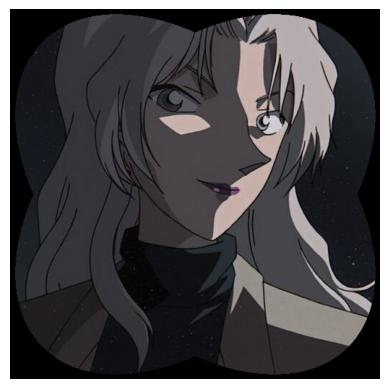

## Hàm Main <a class="anchor" id="c11"></a>

nhap ten file anh: vermouth.jpg


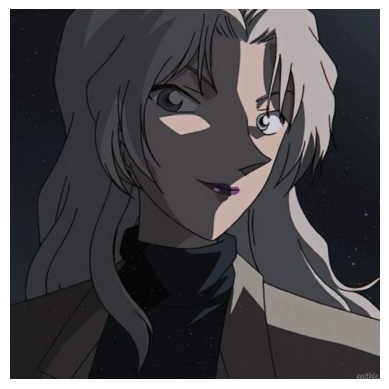

========== MENU ==========
0. Thực hiện tất cả các chức năng 
1. Thay đổi độ sáng của ảnh 
2. Thay đổi độ tương phản của ảnh 
3. Lật ngang hoặc lật dọc ảnh 
4. Chuyển đổi ảnh RGB thành ảnh xám/sepia 
5. Làm mờ/sắc nét ảnh 
6. Cắt ảnh theo kích thước (cắt ở trung tâm) 
7. Cắt ảnh theo khung hình tròn 
8. Cắt ảnh theo khung là 2 hình ellip chéo nhau 
9. Exit
Enter your choice: 0
Thay đổi độ sáng của ảnh 


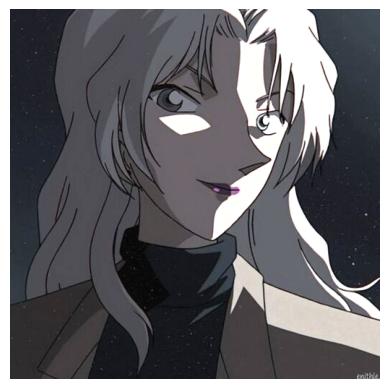

Thay đổi độ tương phản của ảnh 


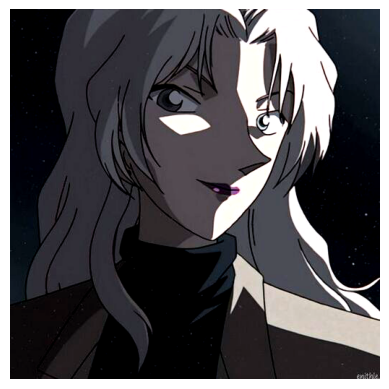

Lật ngang


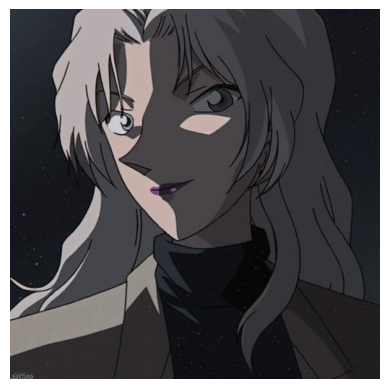

Lật dọc


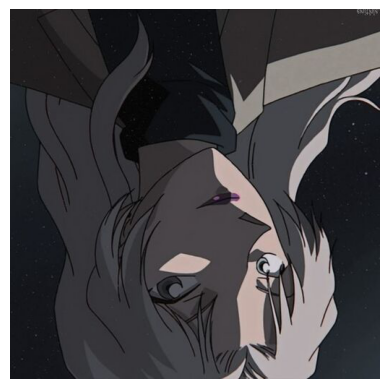

Chuyển đổi ảnh RGB thành ảnh xám


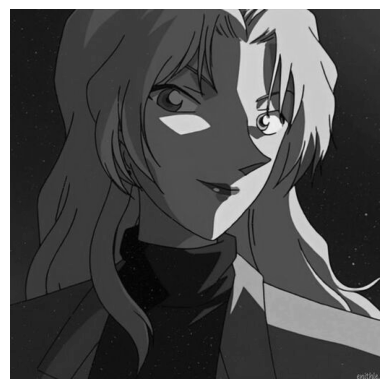

Chuyển đổi ảnh RGB thành ảnh sepia 


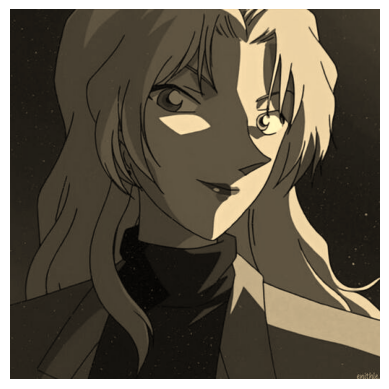

Làm mờ ảnh 


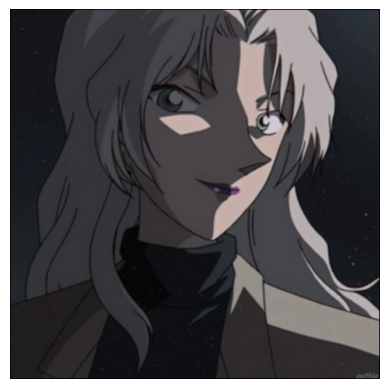

Làm sắc nét ảnh 


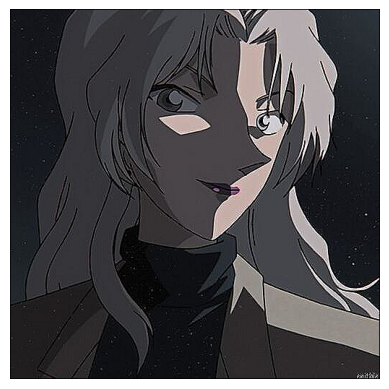

Cắt ảnh theo kích thước (cắt ở trung tâm) 


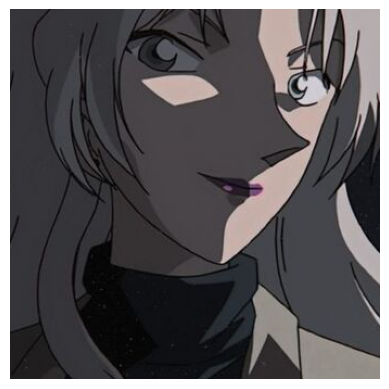

Cắt ảnh theo khung hình tròn 


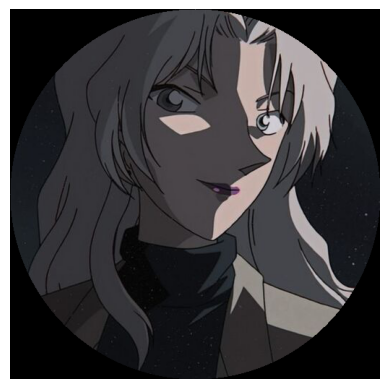

Cắt ảnh theo khung là 2 hình ellip chéo nhau 


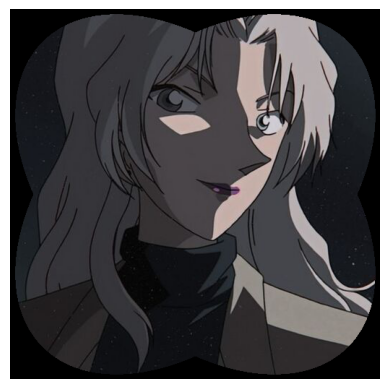

========== MENU ==========
0. Thực hiện tất cả các chức năng 
1. Thay đổi độ sáng của ảnh 
2. Thay đổi độ tương phản của ảnh 
3. Lật ngang hoặc lật dọc ảnh 
4. Chuyển đổi ảnh RGB thành ảnh xám/sepia 
5. Làm mờ/sắc nét ảnh 
6. Cắt ảnh theo kích thước (cắt ở trung tâm) 
7. Cắt ảnh theo khung hình tròn 
8. Cắt ảnh theo khung là 2 hình ellip chéo nhau 
9. Exit
Enter your choice: 9
Exiting...


In [102]:
def print_menu():
    print("========== MENU ==========")
    print("0. Thực hiện tất cả các chức năng ")
    print("1. Thay đổi độ sáng của ảnh ")
    print("2. Thay đổi độ tương phản của ảnh ")
    print("3. Lật ngang hoặc lật dọc ảnh ")
    print("4. Chuyển đổi ảnh RGB thành ảnh xám/sepia ")
    print("5. Làm mờ/sắc nét ảnh ")
    print("6. Cắt ảnh theo kích thước (cắt ở trung tâm) ")
    print("7. Cắt ảnh theo khung hình tròn ")
    print("8. Cắt ảnh theo khung là 2 hình ellip chéo nhau ")
    
    print("9. Exit")
    print("==========================")

def handle_option(option, img_array, image_path):
    if option == 1:
        print("Thay đổi độ sáng của ảnh ")
        
        the_brightness(img_array, image_path)
                
    elif option == 2:
        print("Thay đổi độ tương phản của ảnh ")
        
        the_contrast(img_array, image_path)
        
    elif option == 3:
        print("Lật ngang hoặc lật dọc ảnh ")
        print("\n" + "1. Lật ngang")
        print("2. Lật dọc")
        choice12 = int(input("chọn 1 để lật ngang, 2 để lật dọc: "))
        
        if(choice12 == 1):
            horizontal_flip(img_array, image_path)
        elif(choice12 == 2):
            vertical_flip(img_array, image_path)
    elif option == 4:
        print("Chuyển đổi ảnh RGB thành ảnh xám/sepia ")
        print("\n" + "1. xám")
        print("2. sepia")
        choice12 = int(input("chọn 1 để xám, 2 để sepia: "))
        
        if(choice12 == 1):
            rgb_to_grayscale(img_array, image_path)
            
        elif(choice12 == 2):
            rgb_to_sepia(img_array, image_path)    
        
    elif option == 5:
        print("Làm mờ/sắc nét ảnh ")
        print("\n" + "1. Làm mờ")
        print("2. Làm sắc nét")
        choice12 = int(input("chọn 1 Làm mờ, 2 để Làm sắc nét: "))
        
        if(choice12 == 1):
            blurred(img_array, image_path)         
        elif(choice12 == 2):
            sharpen(img_array, image_path)
    elif option == 6:
        print("Cắt ảnh theo kích thước (cắt ở trung tâm) ")
        
        crop(img_array, image_path)  
        
    elif option == 7:
        print("Cắt ảnh theo khung hình tròn ")
        
        crop_circle(img_array, image_path)    
    elif option == 8:
        print("Cắt ảnh theo khung là 2 hình ellip chéo nhau ")
        
        crop_elip(img_array, image_path)         
    elif option == 9:
        print("Exiting...")
        return True
    
    elif option == 0:
        print("Thay đổi độ sáng của ảnh ")
        the_brightness(img_array, image_path)
        
        print("Thay đổi độ tương phản của ảnh ")
        the_contrast(img_array, image_path)
                
        print("Lật ngang")
        horizontal_flip(img_array, image_path)
        
        print("Lật dọc")
        vertical_flip(img_array, image_path)
        
        print("Chuyển đổi ảnh RGB thành ảnh xám")
        rgb_to_grayscale(img_array, image_path)
        
        print("Chuyển đổi ảnh RGB thành ảnh sepia ")
        rgb_to_sepia(img_array, image_path) 
        
        print("Làm mờ ảnh ")
        blurred(img_array, image_path) 
        
        print("Làm sắc nét ảnh ")
        sharpened(img_array, image_path)    
        
        print("Cắt ảnh theo kích thước (cắt ở trung tâm) ")
        crop(img_array, image_path)
        
        print("Cắt ảnh theo khung hình tròn ")
        crop_circle(img_array, image_path)
        
        print("Cắt ảnh theo khung là 2 hình ellip chéo nhau ")
        crop_elip(img_array, image_path)
    else:
        print("Invalid option. Please select a valid option.")

    return False

def main():
    image_path = input("nhap ten file anh: ")

    # Đọc ảnh
    image = Image.open(image_path)
    
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    
    # Chuyển đổi ảnh
    img_array = np.array(image)
    
    exit_menu = False
    while not exit_menu:
        print_menu()
        choice = input("Enter your choice: ")

        try:
            choice = int(choice)
            exit_menu = handle_option(choice, img_array, image_path)
        except ValueError:
            print("Invalid input. Please enter a number.")


if __name__ == '__main__':
    main()

## Tài Liệu Tham Khảo<a class="anchor" id="c12"></a>
- https://suretest.vn/cung-co/bai-3-phuong-trinh-duong-elip-7215.html
- ChatGPT